<a href="https://colab.research.google.com/github/Kasuletrevor/Kasuletrevor/blob/main/FSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
# from IPython.display import Audio
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
os.getcwd()

'/content'

In [4]:
# from google.colab import files

# # Open the file and read its contents
# with files.open('filename.txt', 'r') as f:
#   contents = f.read()

In [ ]:
# !pip install IPython

# Kaggle API

In [7]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"kasulejohntrevor","key":"2cd289afcd50553c35b2a4aedbc160f3"}'}

In [6]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# !your dataset api command
!kaggle datasets download -d tommyngx/fluent-speech-corpus 

fluent-speech-corpus.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
from zipfile import ZipFile
file_name = 'fluent-speech-corpus.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


# CHECKING DATASET AND PATHS

In [ ]:
os.getcwd()

'/content'

In [ ]:
ls

drive/                           fluent-speech-corpus.zip  sample_data/
fluent_speech_commands_dataset/  kaggle.json


In [ ]:
ls fluent_speech_commands_dataset

 data/  'Fluent Speech Commands Public License.pdf'   readme.md   wavs/


In [ ]:
ls fluent_speech_commands_dataset/data/

speaker_demographics.csv  test_data.csv  train_data.csv  valid_data.csv


In [ ]:
df = pd.read_csv("fluent_speech_commands_dataset/data/train_data.csv")

In [ ]:
df.head()

,Unnamed: 0,path,speakerId,transcription,action,object,location
0,0,wavs/speakers/2BqVo8kVB2Skwgyb/0a3129c0-4474-1...,2BqVo8kVB2Skwgyb,Change language,change language,none,none
1,1,wavs/speakers/2BqVo8kVB2Skwgyb/0ee42a80-4474-1...,2BqVo8kVB2Skwgyb,Resume,activate,music,none
2,2,wavs/speakers/2BqVo8kVB2Skwgyb/144d5be0-4474-1...,2BqVo8kVB2Skwgyb,Turn the lights on,activate,lights,none
3,3,wavs/speakers/2BqVo8kVB2Skwgyb/1811b6e0-4474-1...,2BqVo8kVB2Skwgyb,Switch on the lights,activate,lights,none
4,4,wavs/speakers/2BqVo8kVB2Skwgyb/1d9f3920-4474-1...,2BqVo8kVB2Skwgyb,Switch off the lights,deactivate,lights,none


In [ ]:
df['transcription'].nunique()

248

In [24]:
df["action"]

0        change language
1               activate
2               activate
3               activate
4             deactivate
              ...       
23127    change language
23128    change language
23129    change language
23130    change language
23131         deactivate
Name: action, Length: 23132, dtype: object

In [ ]:
df_actions = df['action'].unique()
actions= {}
for i, action in enumerate(df_actions):
    actions[i] = action

print(actions)

{0: 'change language', 1: 'activate', 2: 'deactivate', 3: 'increase', 4: 'decrease', 5: 'bring'}


In [ ]:
df_objects = df['object'].unique()
objects= {}
for i, object in enumerate(df_objects):
    objects[i] = object
    
print(objects)

{0: 'none', 1: 'music', 2: 'lights', 3: 'volume', 4: 'heat', 5: 'lamp', 6: 'newspaper', 7: 'juice', 8: 'socks', 9: 'Chinese', 10: 'Korean', 11: 'English', 12: 'German', 13: 'shoes'}


In [ ]:
train_df = df.copy()

In [ ]:
train_df.head()

,Unnamed: 0,path,speakerId,transcription,action,object,location
0,0,wavs/speakers/2BqVo8kVB2Skwgyb/0a3129c0-4474-1...,2BqVo8kVB2Skwgyb,Change language,change language,none,none
1,1,wavs/speakers/2BqVo8kVB2Skwgyb/0ee42a80-4474-1...,2BqVo8kVB2Skwgyb,Resume,activate,music,none
2,2,wavs/speakers/2BqVo8kVB2Skwgyb/144d5be0-4474-1...,2BqVo8kVB2Skwgyb,Turn the lights on,activate,lights,none
3,3,wavs/speakers/2BqVo8kVB2Skwgyb/1811b6e0-4474-1...,2BqVo8kVB2Skwgyb,Switch on the lights,activate,lights,none
4,4,wavs/speakers/2BqVo8kVB2Skwgyb/1d9f3920-4474-1...,2BqVo8kVB2Skwgyb,Switch off the lights,deactivate,lights,none


In [65]:
def path(index):
  filepath = df['path'][index]
  filepath = filepath.split('/')
  filename = 'fluent_speech_commands_dataset'
  for i in filepath:
      filename = os.path.join(filename,i)
  return filename

In [ ]:
# uniq = df[['action', 'object']].apply(lambda x: x[0] if x[0] == x[1] else np.NaN, axis=1)

# print(uniq)

In [ ]:
# uniq = uniq.dropna()
# print(uniq)

In [ ]:
# uniq = list(set(df['action']).intersection(set(df['object'])))
# print(uniq)


In [ ]:
# import pandas as pd

# # Create a sample data frame
# df = pd.DataFrame({'col1': ['a', 'b', 'c'], 'col2': ['d', 'e', 'f']})

# # Concatenate the values in col1 and col2 and store the result in a new column
# df['new_col'] = df['col1'] + df['col2']

# print(df)

In [ ]:
def concat(row):
  return row['action'] + ' ' + row['object'] + ' ' +row['location']

df['intent'] = df.apply(concat, axis=1)
# print(df)

In [ ]:
df_objects = df['intent'].unique()
objects= {}
for i, intent in enumerate(df_objects):
    objects[i] = intent

objects

{0: 'change language none none',
 1: 'activate music none',
 2: 'activate lights none',
 3: 'deactivate lights none',
 4: 'increase volume none',
 5: 'decrease volume none',
 6: 'increase heat none',
 7: 'decrease heat none',
 8: 'deactivate music none',
 9: 'activate lamp none',
 10: 'deactivate lamp none',
 11: 'activate lights kitchen',
 12: 'activate lights bedroom',
 13: 'activate lights washroom',
 14: 'deactivate lights kitchen',
 15: 'deactivate lights bedroom',
 16: 'deactivate lights washroom',
 17: 'increase heat kitchen',
 18: 'increase heat bedroom',
 19: 'increase heat washroom',
 20: 'decrease heat kitchen',
 21: 'decrease heat bedroom',
 22: 'decrease heat washroom',
 23: 'bring newspaper none',
 24: 'bring juice none',
 25: 'bring socks none',
 26: 'change language Chinese none',
 27: 'change language Korean none',
 28: 'change language English none',
 29: 'change language German none',
 30: 'bring shoes none'}

In [ ]:
df.tail()

,Unnamed: 0,path,speakerId,transcription,action,object,location,intent
23127,23127,wavs/speakers/zZezMeg5XvcbRdg3/b946b340-45e0-1...,zZezMeg5XvcbRdg3,I need to practice my Chinese. Switch the lang...,change language,Chinese,none,change language Chinese none
23128,23128,wavs/speakers/zZezMeg5XvcbRdg3/beb27cb0-45e0-1...,zZezMeg5XvcbRdg3,I need to practice my German. Switch the language,change language,German,none,change language German none
23129,23129,wavs/speakers/zZezMeg5XvcbRdg3/c45f94e0-45e0-1...,zZezMeg5XvcbRdg3,I need to practice my Korean. Switch the language,change language,Korean,none,change language Korean none
23130,23130,wavs/speakers/zZezMeg5XvcbRdg3/ca60c080-45e0-1...,zZezMeg5XvcbRdg3,I need to practice my English. Switch the lang...,change language,English,none,change language English none
23131,23131,wavs/speakers/zZezMeg5XvcbRdg3/cf10b400-45e0-1...,zZezMeg5XvcbRdg3,Turn the washroom lights off,deactivate,lights,washroom,deactivate lights washroom


In [25]:
df['intent'].nunique()

31

In [23]:
import random

# Generate a random integer between 1 and 3793
f = random.randint(1, 3793)
print(f)


939


In [27]:
filepath = df['path'][f]

In [24]:
filepath = df['path'][f]
filepath = filepath.split('/')
filename = 'fluent_speech_commands_dataset'
for i in filepath:
    filename = os.path.join(filename,i)
data,sr = librosa.load(filename)

In [ ]:
filename = 'fluent_speech_commands_dataset'
for i in filepath:
    filename = os.path.join(filename,i)
filename

'fluent_speech_commands_dataset/wavs/speakers/73bEEYMKLwtmVwV43/caa9bd30-452c-11e9-b1e4-e5985dca719e.wav'

In [33]:
data.shape

(88200,)

In [20]:
sr

22050

In [32]:
  max_length = 4*sr
  data = pad_truncate_audio(data, max_length)
  data

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [34]:
%%time
audio_lengths=[]
for index, row in df.iterrows():
  filepath = row['path']
  filepath = filepath.split('/')
  filename = 'fluent_speech_commands_dataset'
  for i in filepath:
      filename = os.path.join(filename,i)
  data,sr = librosa.load(filename)
  audio_length = data.shape[0]/sr
  audio_lengths.append(audio_length)


CPU times: user 17min 30s, sys: 8.83 s, total: 17min 39s
Wall time: 17min 48s


In [36]:
len(audio_lengths)

23132

In [40]:
lengths = np.array(audio_lengths)
max(lengths)

13.22671201814059

In [41]:
min(lengths)

0.6502040816326531

In [58]:
np.mean(lengths)

2.290228982595401

In [62]:
np.median(lengths)

2.2187301587301587

In [ ]:
#searching for index of the longest audio file 
for index,length in enumerate(lengths):
  if length == max(lengths):
    print(index)
    break
  else:
    pass

In [51]:
filepath = df['path'][index]
filepath = filepath.split('/')
filename = 'fluent_speech_commands_dataset'
for i in filepath:
    filename = os.path.join(filename,i)
data,sr = librosa.load(filename)


In [54]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.00224531,
       -0.00196265,  0.        ], dtype=float32)

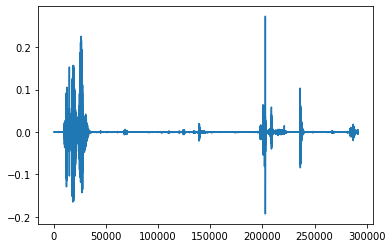

In [52]:
plt.plot(data)
plt.show()

In [53]:
ipd.Audio(filename)

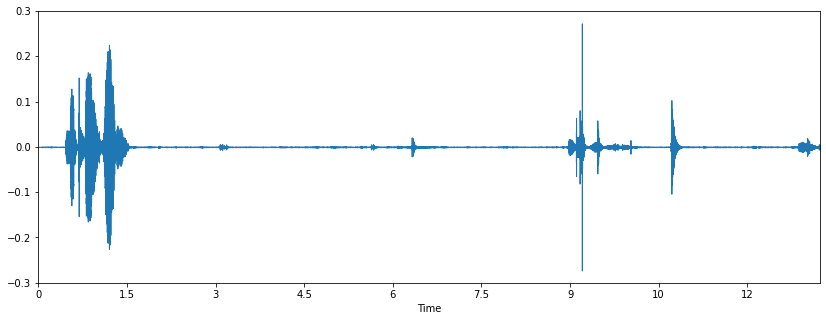

In [55]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=sr)

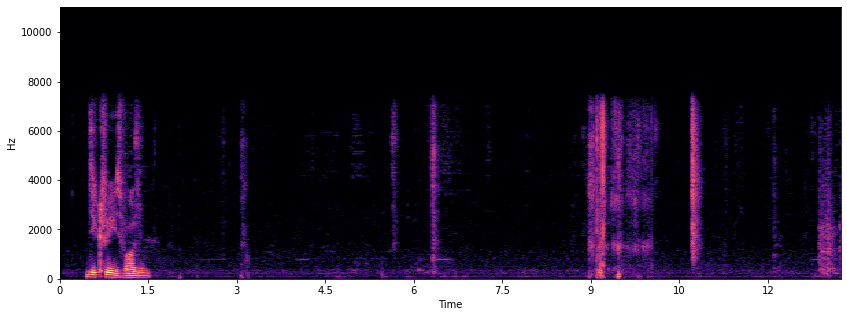

In [56]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [57]:
mean_audio = np.mean(audio_lengths)
mean_audio

2.290228982595401

In [104]:
#counting how many audios are longer than the mean of the lenghths
count = 0
leng = []
indices = []
for index,length in enumerate(lengths):
  if length >= 8:
    count += 1
    leng.append(length)
    indices.append(index)

print(f'count:{count}')

count:7


In [70]:
len(indices)

82

In [107]:
i = indices[1]

In [108]:
ipd.Audio(path(i))

In [93]:
audio,_ = librosa.load(path(i))

In [ ]:
    # data,sr = librosa.load(filename)
    # num_mfcc=13
    # n_fft=2048
    # hop_length=512

    # #extract mfccs
    # mfcc_features = librosa.feature.mfcc(data, sr, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
    # mfcc = mfcc_features
    # timesteps = mfcc.shape[0]
    # num_mfccs = mfcc.shape[1]
    # mfccs_3d = np.expand_dims(mfcc, axis=2)

In [ ]:
mfccs_3d.shape

(13, 92, 1)

In [17]:
  max_length = 6*sr
    
  data = pad_truncate_audio(data, max_length))

SyntaxError: ignored

# ***UNUSED CODE***

> This section contains code that I will need for reference.




In [ ]:
# # Load the audio data and sample rate
# data, sr = librosa.load('audio_file.wav')

# # Pre-process the audio data (optional)
# data = librosa.feature.rmse(data)

# # Compute the power spectrum
# power_spectrum = np.abs(librosa.stft(data)) ** 2

# # Extract the MFCCs
# mfccs = librosa.feature.mfcc(S=power_spectrum, n_mfcc=20)

# # Perform CMN on the MFCCs (optional)
# mfccs = librosa.util.normalize(mfccs, axis=1)

# This code will load the audio data from the file audio_file.wav, apply root mean square (RMS) energy normalization to the data, compute the power spectrum using the short-time Fourier transform (STFT), extract the MFCCs using a Mel filterbank with 20 filters, and perform CMN on the MFCCs. 
# The resulting MFCCs will be a 2D array, with one row for each frame of audio and one column for each MFCC coefficient.

In [ ]:
import wave
import struct

# Open the audio file as a wave object
# audio_file = wave.open("example.wav", "rb")
audio_file = wave.open(filename, "rb")

# Extract the sampling rate and number of channels from the wave object
sampling_rate = audio_file.getframerate()
num_channels = audio_file.getnchannels()

# Read the entire audio signal as a sequence of frames
audio_signal = audio_file.readframes(-1)

# Convert the frames to a sequence of samples, using the specified
# number of channels and the specified sample width
num_samples = len(audio_signal) // (num_channels * audio_file.getsampwidth())
samples = struct.unpack("{}h".format(num_samples * num_channels), audio_signal)

In [ ]:
import librosa

# Load the audio signal from a file
# audio_signal, sampling_rate = librosa.load("example.wav")
audio_signal, sampling_rate = librosa.load(filename)

# Convert the audio signal to a sequence of samples
samples = librosa.util.buf_to_float(audio_signal, n_bytes=2, dtype=np.float32)

In [ ]:
samples.shape

(81922,)

In [ ]:
# import numpy as np

# # Reshape the MFCCs data into a 3D array
# timesteps = mfccs.shape[0]
# num_mfccs = mfccs.shape[1]
# mfccs_3d = np.expand_dims(mfccs, axis=2)

# # Create the LSTM model
# model = keras.Sequential()
# model.add(keras.layers.LSTM(32, input_shape=(timesteps, num_mfccs)))
# model.add(keras.layers.Dense(1, activation='sigmoid'))

# # Compile and fit the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(mfccs_3d, labels, epochs=10)


In [ ]:
# import json
# import os
# import math
# import librosa

# DATASET_PATH = "path/to/marsyas/dataset"
# JSON_PATH = "data_10.json"
# SAMPLE_RATE = 22050
# TRACK_DURATION = 30 # measured in seconds
# SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


# def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
#     """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.

#         :param dataset_path (str): Path to dataset
#         :param json_path (str): Path to json file used to save MFCCs
#         :param num_mfcc (int): Number of coefficients to extract
#         :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
#         :param hop_length (int): Sliding window for FFT. Measured in # of samples
#         :param: num_segments (int): Number of segments we want to divide sample tracks into
#         :return:
#         """

#     # dictionary to store mapping, labels, and MFCCs
#     data = {
#         "mapping": [],
#         "labels": [],
#         "mfcc": []
#     }

#     samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
#     num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

#     # loop through all genre sub-folder
#     for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

#         # ensure we're processing a genre sub-folder level
#         if dirpath is not dataset_path:

#             # save genre label (i.e., sub-folder name) in the mapping
#             semantic_label = dirpath.split("/")[-1]
#             data["mapping"].append(semantic_label)
#             print("\nProcessing: {}".format(semantic_label))

#             # process all audio files in genre sub-dir
#             for f in filenames:

# 		# load audio file
#                 file_path = os.path.join(dirpath, f)
#                 signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

#                 # process all segments of audio file
#                 for d in range(num_segments):

#                     # calculate start and finish sample for current segment
#                     start = samples_per_segment * d
#                     finish = start + samples_per_segment

#                     # extract mfcc
#                     mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
#                     mfcc = mfcc.T

#                     # store only mfcc feature with expected number of vectors
#                     if len(mfcc) == num_mfcc_vectors_per_segment:
#                         data["mfcc"].append(mfcc.tolist())
#                         data["labels"].append(i-1)
#                         print("{}, segment:{}".format(file_path, d+1))

#     # save MFCCs to json file
#     with open(json_path, "w") as fp:
#         json.dump(data, fp, indent=4)
        
        
# if __name__ == "__main__":
#     save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

In [ ]:
# from scipy.io.wavfile import read
# from python_speech_features import mfcc

# mfccs = []
# labels = []

# for index, row in df.iterrows():
#     # Load the audio file
#     fs, signal = read(row['path'])
    
#     # Extract the MFCCs
#     mfcc_features = mfcc(signal, fs)
    
#     # Append the MFCCs and label to the list
#     mfccs.append(mfcc_features)
#     labels.append(row['label'])


In [ ]:
# import librosa

# mfccs = []
# labels = []

# for index, row in df.iterrows():
#     # Load the audio file
#     signal, fs = librosa.load(row['path'])
    
#     # Extract the MFCCs
#     mfcc_features = librosa.feature.mfcc(signal, fs, n_mfcc=40)
    
#     # Append the MFCCs and label to the list
#     mfccs.append(mfcc_features)
#     labels.append(row['label'])


In [ ]:
# import numpy as np
# import pandas as pd
# import librosa
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from keras.utils import to_categorical
# from keras.layers import Input, SincNet, Conv1D, MaxPooling1D, Flatten, Dense
# from keras.models import Model

# # Load the data and preprocess it
# def preprocess_data(data_path):
#     # Load the data and labels from the CSV file
#     df = pd.read_csv(data_path)
#     X = df['audio_file']
#     y = df['label']

#     # Convert the labels to categorical
#     encoder = LabelEncoder()
#     y = encoder.fit_transform(y)
#     y = to_categorical(y)

#     # Load the audio files and extract features
#     X = np.array([librosa.load(x)[0] for x in X])

#     # Split the data into training and test sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     return X_train, X_test, y_train, y_test, encoder

# # Build the model
# def build_model(input_shape, num_classes):
#     # Input layer
#     input_tensor = Input(shape=input_shape)

#     # SincNet layer
#     sincnet = SincNet(fs=16000, nfilters=64, filter_length=11)(input_tensor)

#     # Conv1D layers
#     x = Conv1D(64, 3, activation='relu')(sincnet)
#     x = MaxPooling1D(pool_size=2)(x)
#     x = Conv1D(64, 3, activation='relu')(x)
#     x = MaxPooling1D(pool_size=2)(x)

#     # Flatten and dense layers
#     x = Flatten()(x)
#     x = Dense(64, activation='relu')(x)
#     output_tensor = Dense(num_classes, activation='softmax')(x)

#     # Create the model
#     model = Model(input_tensor, output_tensor)

#     return model

# # Load the data and build the model
# X_train, X_test, y_train, y_test, encoder = preprocess_data('data.csv')
# input_shape = (X_train.shape[1], 1)
# num_classes = y_train.shape[1]
# model = build_model(input_shape, num_classes)

# # Compile and train the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

###

In [ ]:
# # truncating the audio
# def pad_truncate_audio(audio, max_length):
#     # Get the audio length and the padding length
#     audio_length = audio.shape[0]
#     padding_length = max_length - audio_length

#     # Pad or truncate the audio as needed
#     if padding_length > 0:
#         audio = np.pad(audio, (0, padding_length), mode='constant')
#     elif padding_length < 0:
#         audio = audio[:max_length]

#     return audio

# # Pad or truncate all audio files to the same length
# max_length = 10000
# X_train = np.array([pad_truncate_audio(x, max_length) for x in X_train])
# X_test = np.array([pad_truncate_audio(x, max_length) for x in X_test])

# **Data** **Preprocessing**

## 1. Loading training set

In [9]:
df = pd.read_csv("fluent_speech_commands_dataset/data/train_data.csv")

In [10]:
def concat(row):
  return row['action'] + ' ' + row['object'] + ' ' +row['location']

In [11]:
df.head()

,Unnamed: 0,path,speakerId,transcription,action,object,location
0,0,wavs/speakers/2BqVo8kVB2Skwgyb/0a3129c0-4474-1...,2BqVo8kVB2Skwgyb,Change language,change language,none,none
1,1,wavs/speakers/2BqVo8kVB2Skwgyb/0ee42a80-4474-1...,2BqVo8kVB2Skwgyb,Resume,activate,music,none
2,2,wavs/speakers/2BqVo8kVB2Skwgyb/144d5be0-4474-1...,2BqVo8kVB2Skwgyb,Turn the lights on,activate,lights,none
3,3,wavs/speakers/2BqVo8kVB2Skwgyb/1811b6e0-4474-1...,2BqVo8kVB2Skwgyb,Switch on the lights,activate,lights,none
4,4,wavs/speakers/2BqVo8kVB2Skwgyb/1d9f3920-4474-1...,2BqVo8kVB2Skwgyb,Switch off the lights,deactivate,lights,none


In [12]:
df['intent'] = df.apply(concat, axis=1)

In [13]:
mfccs = []
labels = []

In [ ]:
# #function to load data
# def load_set(path):
#   #load dataframe
#   df = pd.read_csv("path")
#   df['intent'] = df.apply(concat, axis=1)
#   mfccs = []
#   labels = []
#   for index, row in df.iterrows():
#     filepath = row['path']
#     filepath = filepath.split('/')
#     filename = 'fluent_speech_commands_dataset'
#     for i in filepath:
#       filename = os.path.join(filename,i)
    
#     #filename extracted
#     # Load the audio file
#     num_mfcc=13
#     n_fft=2048
#     hop_length=512

#     #extract mfccs
#     mfcc_features = librosa.feature.mfcc(data, sr, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
#     mfcc_features.T

#     mfccs.append(mfcc_features)
#     labels.append(row['intent'])
#     # Determine the maximum number of MFCCs
#     max_mfccs = max([mfcc.shape[1] for mfcc in mfccs])

#     # Pad the MFCC arrays with zeros so that they all have the same shape
#     padded_mfccs = [np.pad(mfcc, ((0,0), (0, max_mfccs - mfcc.shape[1])), 'constant') for mfcc in mfccs]

#     # Stack the padded MFCC arrays into a single matrix
#     mfccs = np.vstack(padded_mfccs)


#     # Convert the labels to a numerical format using LabelEncoder

#     le = LabelEncoder()
#     labels = le.fit_transform(labels)

#     return mfccs, labels

In [ ]:
for index, row in df.iterrows():
    print(index)
    filepath = row['path']
    filepath = filepath.split('/')
    filename = 'fluent_speech_commands_dataset'
    for i in filepath:
      filename = os.path.join(filename,i)
    
    #filename extracted
    # Load the audio file
    data,sr = librosa.load(filename)
    max_length = 4*sr
    data = pad_truncate_audio(data, max_length)

    num_mfcc=13
    n_fft=2048
    hop_length=512

    #extract mfccs
    mfcc_features = librosa.feature.mfcc(data, sr, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = mfcc_features.T

    mfccs.append(mfcc)
    labels.append(row['intent'])
    

In [36]:
mfccs[45].shape

(109, 13)

In [38]:
max_shape = max([mfcc.shape for mfcc in mfccs], key=lambda x: x[0])
max_shape

(221, 13)

In [40]:
max_shape = max([mfcc.shape for mfcc in mfccs], key=lambda x: x[0])

# Pad the shorter MFCCs with zeros to have the same shape
padded_mfcc_list = []
for mfcc in mfccs:
    padded_mfcc = np.pad(mfcc, [(0, max_shape[0] - mfcc.shape[0]), (0, 0)], 'constant')
    padded_mfcc_list.append(padded_mfcc)

# Convert the padded list to a NumPy array
mfcc_array = np.array(padded_mfcc_list)
mfcc_array.shape


(24379, 221, 13)

In [42]:
len(labels)

24379

In [ ]:
# #  it means that the MFCC arrays have different shapes. 
# This can happen if the audio files have different lengths, or if you are using a variable number of MFCCs for different audio files.
# # To fix this issue, you can pad the MFCC arrays with zeros so that they all have the same shape, like this:

In [ ]:
# # Determine the maximum number of MFCCs
# max_mfccs = max([mfcc.shape[0] for mfcc in mfccs])

# # Pad the MFCC arrays with zeros so that they all have the same shape
# padded_mfccs = [np.pad(mfcc, ((0,0), (0, max_mfccs - mfcc.shape[0])), 'constant') for mfcc in mfccs]
# len(padded_mfccs)

In [43]:
len(labels)

24379

In [44]:
mfcc_array.shape

(24379, 221, 13)

In [45]:
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(mfccs, labels, test_size=0.2, random_state=42)


In [46]:
X_train = mfcc_array
y_train = labels

In [47]:
X_train.shape

(24379, 221, 13)

In [48]:
labels_decoded = le.inverse_transform(labels)
labels_decoded

array(['change language none none', 'activate music none',
       'activate lights none', ..., 'change language Korean none',
       'change language English none', 'deactivate lights washroom'],
      dtype='<U28')

In [49]:
y_train.shape

(24379,)

## 2. Loading test set

In [50]:
df1 = pd.read_csv("fluent_speech_commands_dataset/data/test_data.csv")

In [51]:
df1['intent'] = df1.apply(concat, axis=1)

In [52]:
df1.head()

,Unnamed: 0,path,speakerId,transcription,action,object,location,intent
0,0,wavs/speakers/4BrX8aDqK2cLZRYl/cbdf5700-452c-1...,4BrX8aDqK2cLZRYl,Turn on the lights,activate,lights,none,activate lights none
1,1,wavs/speakers/4BrX8aDqK2cLZRYl/cff92500-452c-1...,4BrX8aDqK2cLZRYl,Turn off the lights,deactivate,lights,none,deactivate lights none
2,2,wavs/speakers/4BrX8aDqK2cLZRYl/d36722a0-452c-1...,4BrX8aDqK2cLZRYl,Change language,change language,none,none,change language none none
3,3,wavs/speakers/4BrX8aDqK2cLZRYl/d73086b0-452c-1...,4BrX8aDqK2cLZRYl,Pause the music,deactivate,music,none,deactivate music none
4,4,wavs/speakers/4BrX8aDqK2cLZRYl/da54f830-452c-1...,4BrX8aDqK2cLZRYl,Resume,activate,music,none,activate music none


In [53]:
mfccs_ = []
labels_ = []

In [ ]:
for index, row in df1.iterrows():
    print(index)
    filepath = row['path']
    filepath = filepath.split('/')
    filename = 'fluent_speech_commands_dataset'
    for i in filepath:
      filename = os.path.join(filename,i)
    
    #filename extracted
    # Load the audio file
    data,sr = librosa.load(filename)
    max_length = 4*sr
    data = pad_truncate_audio(data, max_length)

    num_mfcc=13
    n_fft=2048
    hop_length=512

    #extract mfccs
    mfcc_features = librosa.feature.mfcc(data, sr, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc_ = mfcc_features.T

    mfccs_.append(mfcc)
    labels_.append(row['intent'])


In [57]:
max_shape = max([mfcc.shape for mfcc in mfccs], key=lambda x: x[0])
max_shape

(221, 13)

In [58]:
#pad the mfccs to same size
max_shape = max([mfcc.shape for mfcc in mfccs], key=lambda x: x[0])

# Pad the shorter MFCCs with zeros to have the same shape
padded_mfcc_list = []
for mfcc in mfccs_:
    padded_mfcc = np.pad(mfcc, [(0, max_shape[0] - mfcc.shape[0]), (0, 0)], 'constant')
    padded_mfcc_list.append(padded_mfcc)

# Convert the padded list to a NumPy array
mfcc_array_ = np.array(padded_mfcc_list)
mfcc_array_.shape

(3882, 221, 13)

In [59]:
# max_mfccs = max([mfcc.shape[1] for mfcc in mfccs])

# # Pad the MFCC arrays with zeros so that they all have the same shape
# padded_mfccs = [np.pad(mfcc, ((0,0), (0, max_mfccs - mfcc.shape[1])), 'constant') for mfcc in mfccs]

# # Stack the padded MFCC arrays into a single matrix
# mfccs = np.vstack(padded_mfccs)


# # Convert the labels to a numerical format
# from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_ = le.fit_transform(labels_)

In [61]:
len(labels_)

3882

In [62]:
X_test = mfcc_array_
y_test = labels_

In [63]:
np.max(labels_)

30

# **Model** development

## Deep Neural network

In [64]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [68]:
# from tensorflow.keras.models import Sequential
import tensorflow.keras as keras

num_classes = 31
model = keras.Sequential([

        # input layer
      keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),

        # 1st dense layer
      keras.layers.Dense(512, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.25),

        # 2nd dense layer
      keras.layers.Dense(256, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.35),

        # 3rd dense layer
      keras.layers.Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.35),

        # output layer
      keras.layers.Dense(num_classes, activation='softmax')
    ])
    # compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2873)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1471488   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [69]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)

Epoch 1/30
762/762 [==============================] - 19s 24ms/step - loss: 17.7674 - accuracy: 0.0574 - val_loss: 4.4140 - val_accuracy: 0.1041
Epoch 2/30
762/762 [==============================] - 18s 24ms/step - loss: 4.6863 - accuracy: 0.0892 - val_loss: 4.3620 - val_accuracy: 0.1041
Epoch 3/30
762/762 [==============================] - 19s 25ms/step - loss: 4.4332 - accuracy: 0.0954 - val_loss: 4.3082 - val_accuracy: 0.1041
Epoch 4/30
762/762 [==============================] - 19s 25ms/step - loss: 4.3315 - accuracy: 0.0979 - val_loss: 4.2505 - val_accuracy: 0.1041
Epoch 5/30
762/762 [==============================] - 19s 25ms/step - loss: 4.2461 - accuracy: 0.0984 - val_loss: 4.1891 - val_accuracy: 0.1041
Epoch 6/30
762/762 [==============================] - 21s 27ms/step - loss: 4.1759 - accuracy: 0.0985 - val_loss: 4.1236 - val_accuracy: 0.1041
Epoch 7/30
762/762 [==============================] - 19s 25ms/step - loss: 4.1033 - accuracy: 0.0989 - val_loss: 4.0545 - val_accuracy

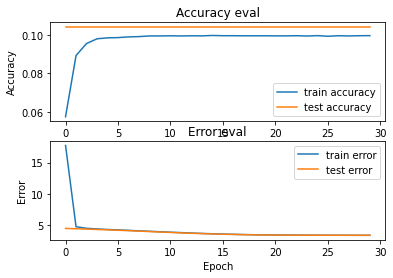

In [70]:
plot_history(history)

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=32)

122/122 [==============================] - 1s 9ms/step - loss: 3.3271 - accuracy: 0.1047


## CNN

In [71]:
# Preprocess the MFCCs for train set
X_train1 = X_train.astype('float32')
X_train1 /= np.max(np.abs(X_train1))

# Preprocess the MFCCs for test set
X_test1 = X_test.astype('float32')
X_test1 /= np.max(np.abs(X_test1))

In [74]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization,GaussianNoise

num_classes = 31
# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(X_train1.shape[1], X_train1.shape[2], 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile and train the CNN
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 219, 11, 32)       320       
                                                                 
 conv2d_5 (Conv2D)           (None, 217, 9, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 108, 4, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 108, 4, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 27648)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               3539072   
                                                      

In [ ]:
model = Sequential()

model.add(Conv2D(32, input_shape=(X_train1.shape[1], X_train1.shape[2], 1), kernel_size=(3,3),  activation = "relu"))
# model.add(MaxPooling2D(pool_size=(2,2), ))

model.add(Conv2D(32, kernel_size=(3,3),   activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2), ))

model.add(Conv2D(64, kernel_size=(3,3), activation = "relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(128, kernel_size=(3,3), activation = "relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu" ))
model.add(Dense(32, activation = "relu"))
model.add(Dense(num_classes, activation='softmax'))

# Compile and train the CNN
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
model.summary()

In [ ]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(X_train1.shape[1], X_train1.shape[2], 1), kernel_size=(11,11), strides=(4,4), padding="same", activation = "relu"))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# # Max Pooling
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
# Batch Normalisation
model.add(BatchNormalization())

# # 5th Convolutional Layer
# model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# # Max Pooling
# model.add(MaxPooling2D(pool_size=(2,2))) #, strides=(2,2), padding="valid"

# # Batch Normalisation
# model.add(BatchNormalization())

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
regularizer =keras.regularizers.l2(l=0.0005)
model.add(GaussianNoise(0.1))
model.add(Dense(units = 4096, activation = "relu", kernel_regularizer = regularizer))

# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None))

# 2nd Fully Connected Layer
regularizer =keras.regularizers.l2(l=0.0005)
model.add(GaussianNoise(0.1))
model.add(Dense(units = 2048, activation = "relu", kernel_regularizer = regularizer ))

# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Fully Connected Layer
regularizer =keras.regularizers.l2(l=0.0005)
model.add(GaussianNoise(0.1))
model.add(Dense(2048, activation = "relu", kernel_regularizer = regularizer))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())


# Output Layer
model.add(Dense(num_classes, activation='softmax'))

# Compile and train the CNN
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train1, y_train, epochs=20, batch_size=128, validation_data=(X_test1, y_test))


Epoch 1/20
191/191 [==============================] - 406s 2s/step - loss: 23.6667 - accuracy: 0.1234 - val_loss: 20.8243 - val_accuracy: 0.0399
Epoch 2/20
191/191 [==============================] - 407s 2s/step - loss: 15.8021 - accuracy: 0.1719 - val_loss: 12.7573 - val_accuracy: 0.1041
Epoch 3/20
191/191 [==============================] - 405s 2s/step - loss: 10.4651 - accuracy: 0.2502 - val_loss: 11.9689 - val_accuracy: 0.0250
Epoch 4/20
191/191 [==============================] - 401s 2s/step - loss: 9.0540 - accuracy: 0.2997 - val_loss: 9.7779 - val_accuracy: 0.0909
Epoch 5/20
191/191 [==============================] - 395s 2s/step - loss: 6.2692 - accuracy: 0.3723 - val_loss: 11.2052 - val_accuracy: 0.0399
Epoch 6/20
191/191 [==============================] - 394s 2s/step - loss: 4.8931 - accuracy: 0.4392 - val_loss: 10.4185 - val_accuracy: 0.0399
Epoch 7/20
191/191 [==============================] - 400s 2s/step - loss: 4.0684 - accuracy: 0.4828 - val_loss: 15.7471 - val_accurac

In [1]:
plot_history(history)

NameError: ignored

In [ ]:
# # Evaluate the CNN
# score = model.evaluate(mfccs_val, labels_val, verbose=0)
# print('Validation loss:', score[0])
# print('Validation accuracy:', score[1])

## sincnet

In [ ]:
filepath = df['path'][f]
filepath = filepath.split('/')
filename = 'fluent_speech_commands_dataset'
for i in filepath:
    filename = os.path.join(filename,i)
data,sr = librosa.load(filename)

In [ ]:
import librosa

# Load the audio signal from a file
# audio_signal, sampling_rate = librosa.load("example.wav")
audio_signal, sampling_rate = librosa.load(filename)

# Convert the audio signal to a sequence of samples
sampled = librosa.util.buf_to_float(audio_signal, n_bytes=2, dtype=np.float32)

In [ ]:
sampled.dtype

dtype('float32')

In [ ]:
sampled.shape

(158056,)

In [ ]:
!pip install sincnet-tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#function to load data
def load_set(path):
  #load dataframe
  df = pd.read_csv(path)
  df['intent'] = df.apply(concat, axis=1)
  samples = []
  labels = []
  for index, row in df.iterrows():
    filepath = row['path']
    filepath = filepath.split('/')
    filename = 'fluent_speech_commands_dataset'
    for i in filepath:
      filename = os.path.join(filename,i)
    
    #filename extracted
    # Load the audio file
    data,sr = librosa.load(filename)

    # Convert the audio signal to a sequence of samples
    sample = librosa.util.buf_to_float(audio_signal, n_bytes=2, dtype=np.float32)
    

    samples.append(sample)
    labels.append(row['intent'])

  return samples, labels

In [ ]:
Xtrain, ytrain = load_set("fluent_speech_commands_dataset/data/train_data.csv")


AttributeError: ignored

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D
from tensorflow.keras.layers import LeakyReLU, BatchNormalization, Flatten, MaxPooling1D, Input

from sincnet_tensorflow import SincConv1D, LayerNorm


out_dim = 32 #number of classes

sinc_layer = SincConv1D(N_filt=64,
                        Filt_dim=129,
                        fs=16000,
                        stride=16,
                        padding="SAME")


inputs = Input((32000, 1))

x = sinc_layer(inputs)
x = LayerNorm()(x)

x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)


x = Conv1D(64, 3, strides=1, padding='valid')(x)
x = BatchNormalization(momentum=0.05)(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(64, 3, strides=1, padding='valid')(x)
x = BatchNormalization(momentum=0.05)(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(128, 3, strides=1, padding='valid')(x)
x = BatchNormalization(momentum=0.05)(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(128, 3, strides=1, padding='valid')(x)
x = BatchNormalization(momentum=0.05)(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)

x = Flatten()(x)

x = Dense(256)(x)
x = BatchNormalization(momentum=0.05, epsilon=1e-5)(x)
x = LeakyReLU(alpha=0.2)(x)

x = Dense(256)(x)
x = BatchNormalization(momentum=0.05, epsilon=1e-5)(x)
x = LeakyReLU(alpha=0.2)(x)

prediction = Dense(out_dim, activation='softmax')(x)
model = tf.keras.models.Model(inputs=inputs, outputs=prediction)

model.summary()


NameError: ignored

In [ ]:
# Load the raw audio signal and extract the frames
signal, sr = librosa.load(filename)
frames = librosa.util.frame(signal, frame_length=200, hop_length=10).T

# Calculate the number of frames and features
n_frames, n_features = frames.shape

frames.shape

(4496, 200)

# raw audio

In [12]:
df = pd.read_csv("fluent_speech_commands_dataset/data/train_data.csv")

In [13]:
def concat(row):
  return row['action'] + ' ' + row['object'] + ' ' +row['location']

In [14]:
df['intent'] = df.apply(concat, axis=1)

In [ ]:
audios = []
intents = []
for index, row in df.iterrows():
    filepath = row['path']
    filepath = filepath.split('/')
    filename = 'fluent_speech_commands_dataset'
    for i in filepath:
      filename = os.path.join(filename,i)
    
    #filename extracted
    # Load the audio file
    data,sr = librosa.load(filename)

    audio = data.T

    audios.append(audio)
    intents.append(row['intent'])
    print(index)
print("Done")

In [16]:
max_shape = max([audio.shape for audio in audios], key=lambda x: x[0])
max_shape

(291649,)

In [17]:
sr

22050

In [18]:
min_shape = min([audio.shape for audio in audios], key=lambda x: x[0])
max_shape[0] - min_shape[0]

277312

In [19]:
291649/sr

13.22671201814059

In [16]:
# truncating the audio
def pad_truncate_audio(audio, max_length):
    # Get the audio length and the padding length
    audio_length = audio.shape[0]
    padding_length = max_length - audio_length

    # Pad or truncate the audio as needed
    if padding_length > 0:
        audio = np.pad(audio, (0, padding_length), mode='constant')
    elif padding_length < 0:
        audio = audio[:max_length]

    return audio

In [ ]:
# Pad or truncate all audio files to the same length
max_length = 6*sr
X_train = np.array([pad_truncate_audio(audio, max_length) for audio in audios])

In [110]:
# def pad_audio(audio, max_length):
#     # Get the audio length and the padding length
#     audio_length = audio.shape[0]
#     padding_length = max_length - audio_length

#     # Pad the audio with silence
#     audio = np.pad(audio, (0, padding_length), mode='constant')

#     return audio

In [117]:
maxlength = 6*sr
maxlength

132300